In [2]:
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt


In [3]:
import pandas as pd

In [4]:
# 1st step is raw images selection 
#2nd step is to crop or manual cleaing images to get two eyes face for recognisition using HAAR CASCADE
#3rd step is manual data cleaning
# wave let transformation or feature engineering to see the features of crop faces

In [5]:
img=cv2.imread("C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\test images\\Critics Choice Awards 2022_ Serena.jpg")


In [6]:
img.shape

(1201, 1801, 3)

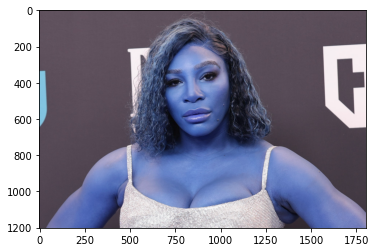

In [7]:
plt.imshow(img)

In [8]:
#it has RGB values if we want to change the color of image we can do as following
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape


(1201, 1801)

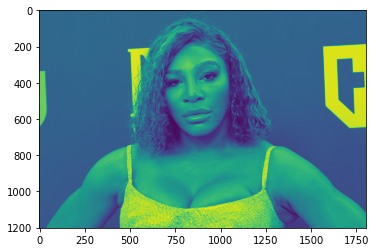

In [9]:
plt.imshow(gray)

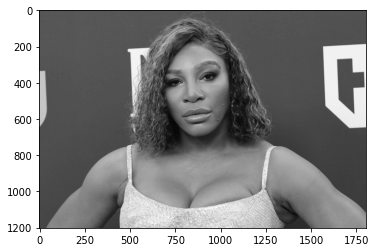

In [10]:
plt.imshow(gray,cmap="gray")

In [11]:
face_cascade=cv2.CascadeClassifier("C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\open cv\\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\open cv\\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5) #it will return array of faces which is available in gray image as we have mentioned it

faces #the array which is output will give height ,width lenght of face and coordinated at which it starts


array([[634, 200, 461, 461]])

In [12]:
(x,y,w,h)=faces[0]
x,y,w,h

(634, 200, 461, 461)

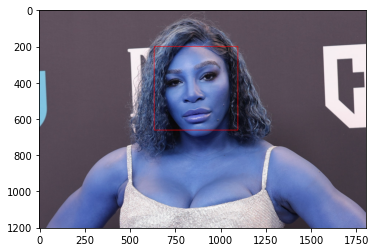

In [13]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #it will draw a rectangle around that face(img) using opencv
plt.imshow(face_img)   #(255,0,0) is RGB color coordinates 255=red all others are zero

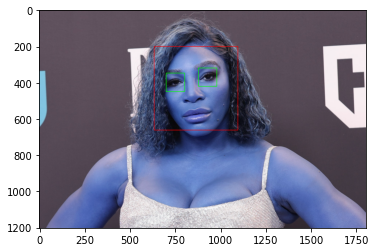

In [14]:
#for drawing two eyes 
cv2.destroyAllWindows()
for (x,y,w,h) in faces: #iterating through alll the faces in this casse we have only one face
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h, x:x+w] #roi=region of interest
    roi_color=face_img[y:y+h,x:x+w] #it will give only rectangle region of face let see in other cell
    eyes=eye_cascade.detectMultiScale(roi_gray) #it will give you eyes
    for(ex,ey,ew,eh) in eyes: #ex,ey,ew,eh because we can have mutiple eyes as for multiple faces in this cases only one face
    
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #green=255 

plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()

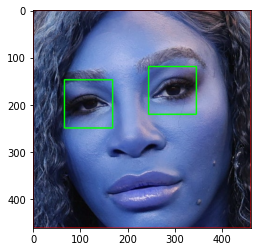

In [15]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray') #we will see cropped img

In [16]:
 #lets write a function which returns a crop face when two eyes are detected clearly
def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return None  # Handle case where image loading failed

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            
            if len(eyes) >= 2:
                return roi_color

        return None  # Handle case where no suitable region is found
    except Exception as e:
        print(f"Error in get_cropped_image_if_2_eyes: {e}")
        return None




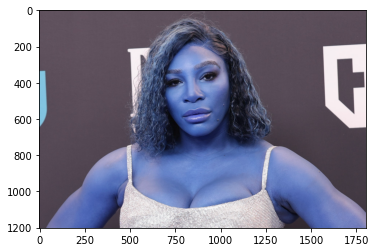

In [17]:
original_image=cv2.imread("C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\test images\\Critics Choice Awards 2022_ Serena.jpg")
plt.imshow(original_image)

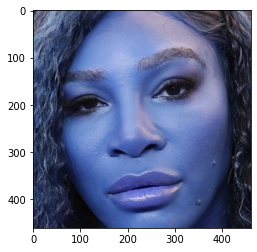

In [18]:
cropped_image=get_cropped_image_if_2_eyes("C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\test images\\Critics Choice Awards 2022_ Serena.jpg")
plt.imshow(cropped_image) #function returning cropped image

In [19]:
#now lets make cropped images of all images sowe can get faces properly
path_to_data='C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets'
path_to_cr_data='C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\'


In [20]:
import os
img_dirs=[] #copying all image directories within datasets which is messi and serena williams
for entry in os.scandir(path_to_data): #will go through all the directories within datassets folder 
    if entry.is_dir():
        img_dirs.append(entry.path)



In [21]:
img_dirs

['C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped',
 'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\messi',
 'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\serena_williams']

In [22]:
#as we dont have any crop folder so we make it now by follwowing code
import shutil
if os.path.exists(path_to_cr_data): #this line remove the folder if exist 
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) #this line creates folder

In [23]:
#now we need to iterate through all images
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('\\')[-1] #splitting names
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]

    for entry in os.scandir(img_dir): #iterate through all images in path folderof img_dir
        roi_color= get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:  
            cropped_folder= path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder:", cropped_folder)
            cropped_file_name=celebrity_name + str(count)+".png"
            cropped_file_path=cropped_folder + "/" + cropped_file_name 
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1
   
 
   

cropped
messi
generating cropped images in folder: C:\Users\oshim\.vscode\SportsPersonClassifier\model\Datasets\cropped\messi
serena_williams
generating cropped images in folder: C:\Users\oshim\.vscode\SportsPersonClassifier\model\Datasets\cropped\serena_williams


Feature engineering 


wavelet transformation #allows to extract important feature from face

In [24]:
import numpy as np
import pywt
import cv2
  
#wavelet transformation function
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

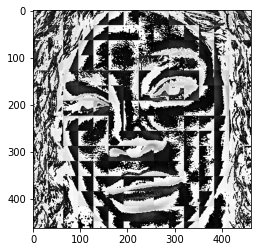

In [25]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [26]:
celebrity_file_names_dict

{'cropped': [],
 'messi': ['C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi1.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi2.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi3.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi4.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi5.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi6.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi7.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi8.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\messi/messi9.png',
  'C:\\Users\\oshim\\.vscode\\SportsPersonClassifier\\model\\Datasets\\cropped\\mess

In [27]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0, 'messi': 1, 'serena_williams': 2}

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [28]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [29]:
len(X[0])

4096

In [30]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(72, 4096)

Data cleaning process is done. Now we are ready to train our model
We will use SVM with rbf kernel tuned with heuristic finetuning

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8888888888888888

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.89        18
   macro avg       0.89      0.89      0.89        18
weighted avg       0.89      0.89      0.89        18



Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [35]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [36]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.925455,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.741818,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.850909,{'logisticregression__C': 1}


In [37]:
best_estimators


{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [38]:
best_estimators['svm'].score(X_test,y_test)


0.8888888888888888

In [39]:
best_estimators['random_forest'].score(X_test,y_test)


0.7222222222222222

In [40]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.9444444444444444

In [41]:
best_clf = best_estimators['svm']


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[9, 0],
       [2, 7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

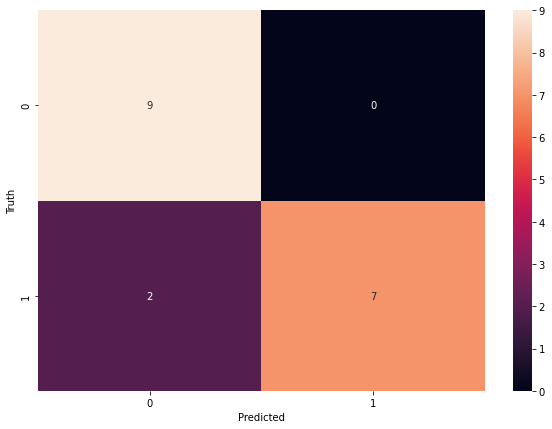

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
class_dict


{'cropped': 0, 'messi': 1, 'serena_williams': 2}

Save the trained model

In [45]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\oshim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [46]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))